In [1]:
%pylab inline
%matplotlib inline

import os

import time
import collections
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/Users/Bya/git/predictEPL/utils/")
sys.path.append("/Users/Bya/git/predictEPL/config/")
sys.path.append("/Users/Bya/git/predictEPL/WebScrapping/")

import paths
import espn_urls
import my_plot
import scrap_espn_gamecast
import emolex
import tokenizer

import useful_methods
from useful_methods import FolderFiles
from useful_methods import csv_dic_df
from useful_methods import FilterDF

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read Soccer Emolex
%time dic_emolex_soccer = emolex.EmolexSoccerDic()

CPU times: user 618 ms, sys: 20.6 ms, total: 639 ms
Wall time: 646 ms


In [3]:
dic_emolex_stemmed_soccer = dic_emolex_soccer

In [35]:
# choosing data
week = str(25)
GW = 'GW' + week
filenames = FolderFiles(GW + '/SingleGames', paths.READ_PATH_EXTRACTED_CSV, ends='.csv')
filenames

['Bournemouth_vs_Arsenal.csv',
 'Chelsea_vs_United.csv',
 'City_vs_Leicester.csv',
 'Liverpool_vs_Sunderland.csv',
 'Newcastle_vs_WestBromwich.csv',
 'Southampton_vs_WestHam.csv',
 'Stoke_vs_Everton.csv',
 'Swansea_vs_Crystal.csv',
 'Tottenham_vs_Watford.csv',
 'Villa_vs_Norwich.csv']

In [36]:
# Set Game
filename = filenames[2]

# Read DF
os.chdir(paths.READ_PATH_EXTRACTED_CSV + GW + '/SingleGames')
df = csv_dic_df(filename)

start_time = time.time()

# [Filter] DF
dfFilter = FilterDF(df)

dfFilter.ith_minute = [int(item) for item in dfFilter.ith_minute]

# # [Filtered] All, Non-Retweet
# dfFilterEmolex = emolex.CreateEmolexDF(dfFilter, dic_emolex, dic_emolex_stemmed)
# dfFilterEmolexNonRetweet = emolex.CreateEmolexDF(dfFilter[dfFilter['status'] != 'retweet'], dic_emolex, dic_emolex_stemmed)

# # [Filtered] Home, Away
dfFilterEmolexSoccerHome = emolex.CreateEmolexDF(dfFilter[dfFilter['side'] == 'home'], dic_emolex_soccer)
dfFilterEmolexSoccerAway = emolex.CreateEmolexDF(dfFilter[dfFilter['side'] == 'away'], dic_emolex_soccer)

# # [Filtered, Non ReTweet] Home, Away
# dfFilterEmolexNonRtHome = emolex.CreateEmolexDF(dfFilter[(dfFilter['side'] == 'home') & (dfFilter['status'] != 'retweet')], dic_emolex)
# dfFilterEmolexNonRtAway = emolex.CreateEmolexDF(dfFilter[(dfFilter['side'] == 'away') & (dfFilter['status'] != 'retweet')], dic_emolex)

# [Filtered, Non ReTweet] Home, Away
dfFilterEmolexSoccerNonRtHome = emolex.CreateEmolexDF(dfFilter[(dfFilter['side'] == 'home') & (dfFilter['status'] != 'retweet')], dic_emolex_soccer)
dfFilterEmolexSoccerNonRtAway = emolex.CreateEmolexDF(dfFilter[(dfFilter['side'] == 'away') & (dfFilter['status'] != 'retweet')], dic_emolex_soccer)

print("[Done]: %.2f" % (time.time() - start_time))

[Done]: 56.75


In [38]:
# Scrap Gamecast
# url = espn_urls.MatchUrl(GW, filename)
url = "http://www.espnfc.us/gamecast/422418/gamecast.html"
dfGameCast = scrap_espn_gamecast.CreateEspnLiveCommentDF(url)

# Create Goal, Attack, Foul dics
%time goals_dic, attacks_dic_home, attacks_dic_away, fouls_dic_home, fouls_dic_away = scrap_espn_gamecast.CreateGAFdics(dfGameCast)

[Match]: Manchester City VS Leicester City
[Scrap Done]: 13.58 sec
CPU times: user 11.2 ms, sys: 1.46 ms, total: 12.7 ms
Wall time: 12.7 ms


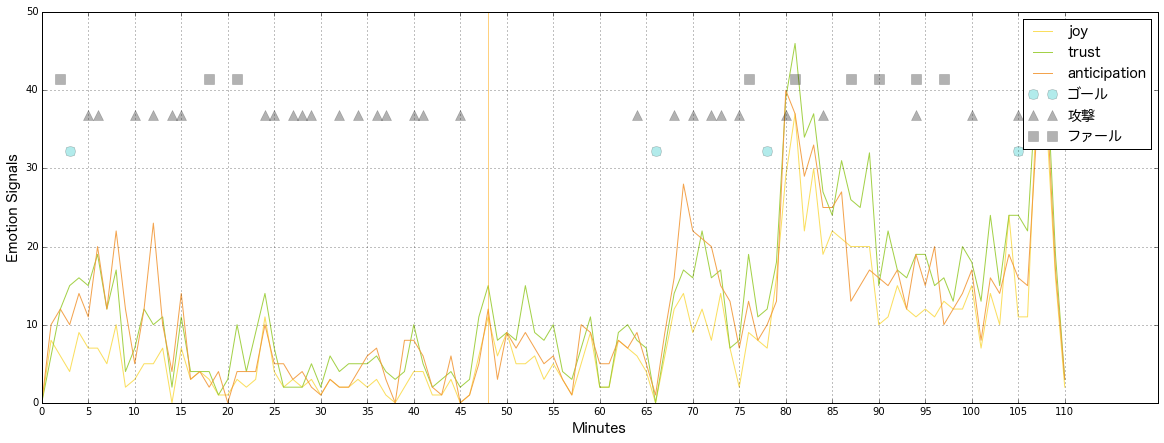

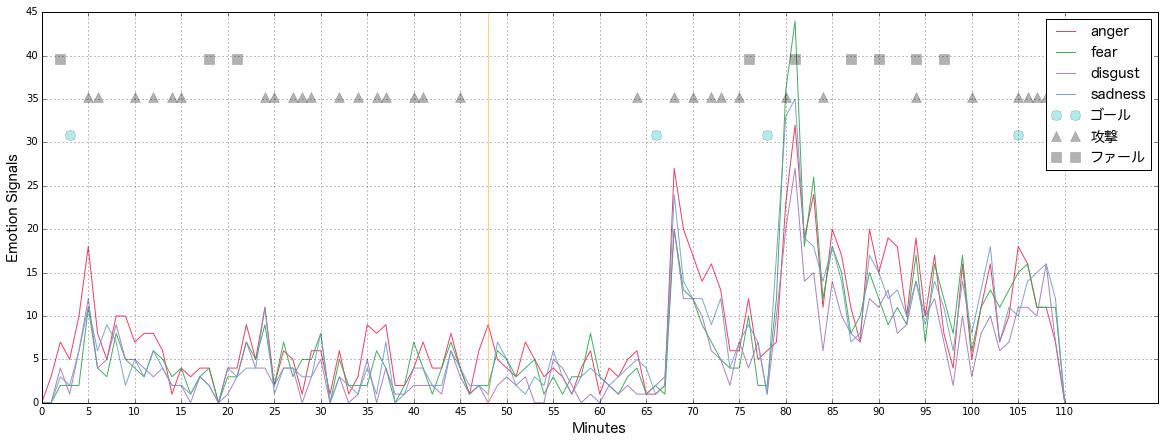

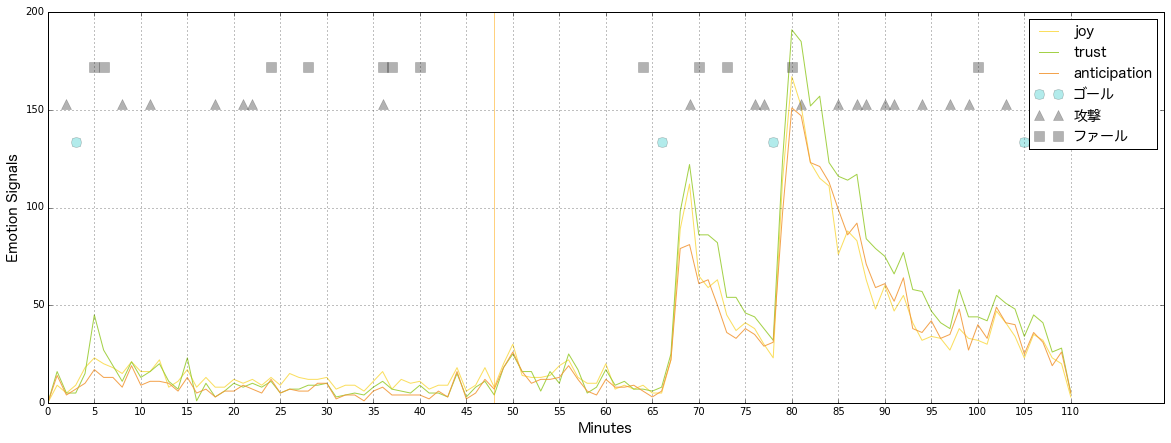

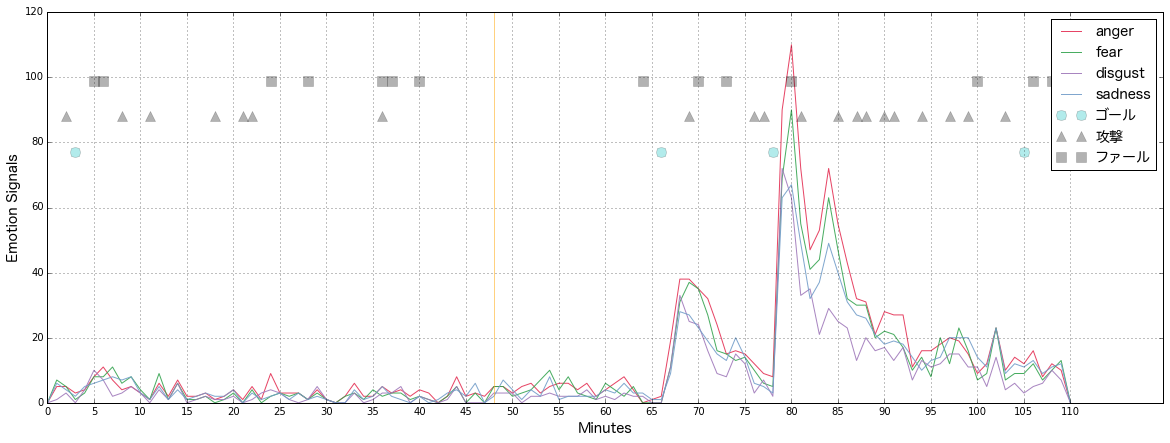

In [39]:
my_plot.Pos3Neg4(dfFilterEmolexSoccerNonRtHome, goals_dic, attacks_dic_home, fouls_dic_home, title='Home')
my_plot.Pos3Neg4(dfFilterEmolexSoccerNonRtAway, goals_dic, attacks_dic_away, fouls_dic_away, title='Away')

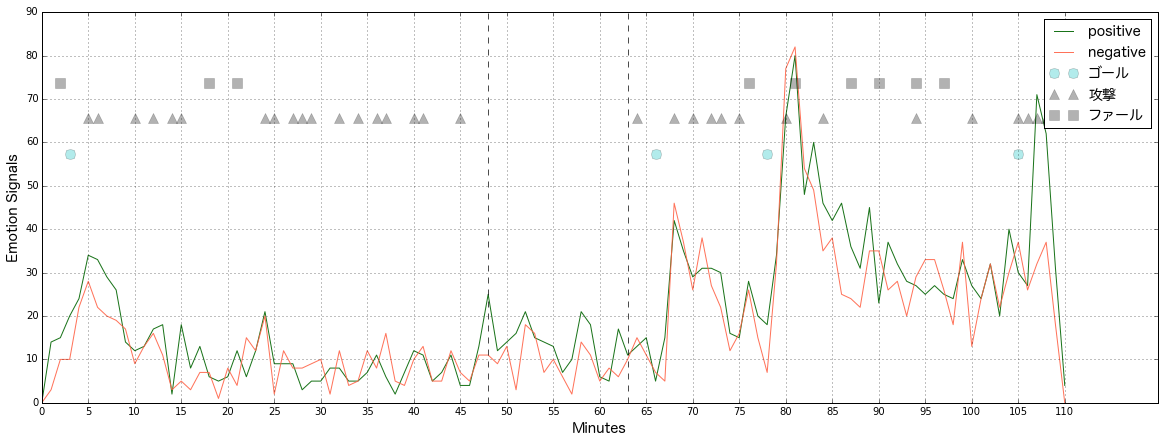

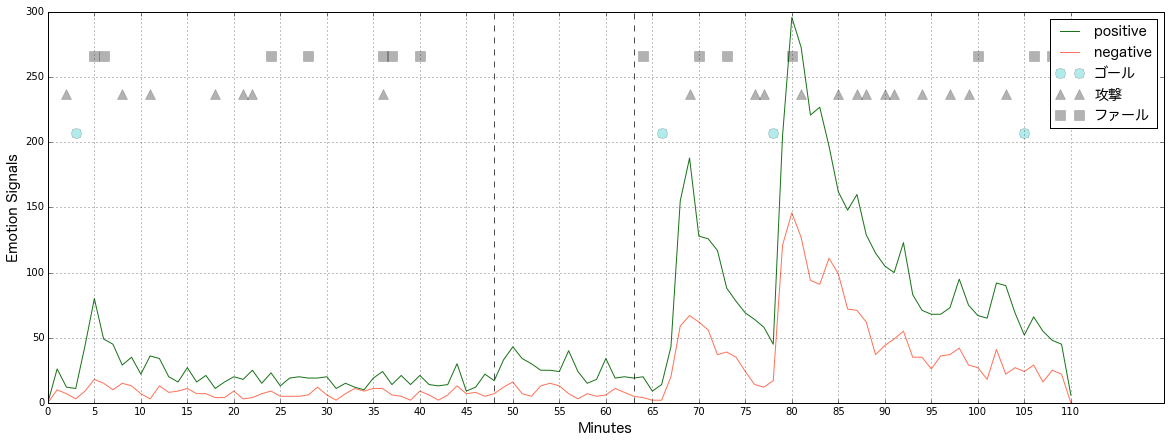

In [40]:
EmolexCats(dfFilterEmolexSoccerNonRtHome, ['positive', 'negative'], goals_dic, attacks_dic_home, fouls_dic_home, 'Home')
EmolexCats(dfFilterEmolexSoccerNonRtAway, ['positive', 'negative'], goals_dic, attacks_dic_away, fouls_dic_away, 'Away')

# my_plot.EmolexCats(dfFilterEmolexSoccerNonRtAway, ['positive', 'negative'], goals_dic, attacks_dic_away, fouls_dic_away, 'Away')

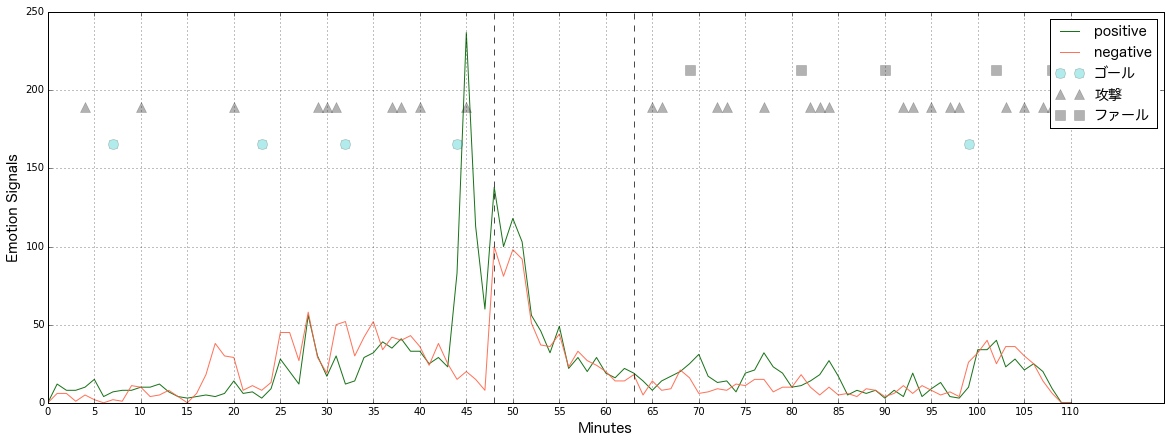

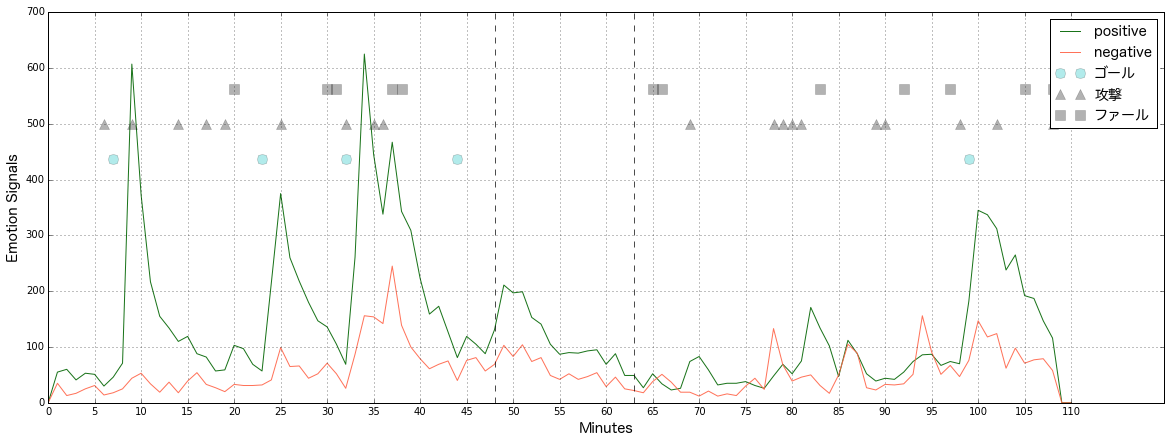

In [34]:
EmolexCats(dfFilterEmolexSoccerHome, ['positive', 'negative'], goals_dic, attacks_dic_home, fouls_dic_home, 'Home')
EmolexCats(dfFilterEmolexSoccerAway, ['positive', 'negative'], goals_dic, attacks_dic_away, fouls_dic_away, 'Away')

# my_plot.EmolexCats(dfFilterEmolexSoccerNonRtAway, ['positive', 'negative'], goals_dic, attacks_dic_away, fouls_dic_away, 'Away')

In [33]:
from matplotlib.font_manager import FontProperties

fp_small = FontProperties(fname=r'/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc', size=14)

# Emolex Category and Colors
categorys = [
    'joy', 'trust', 'anticipation',
    'anger', 'fear', 'disgust', 'sadness',
    'surprise',
    'positive', 'negative',
]
colors_el = [
    '#fadb4d', '#99cc33', '#f2993a',
    '#e43054', '#35a450', '#9f78ba', '#729dc9',
    '#3fa5c0',
    'darkgreen', 'tomato',
]

# plot multiple data series
def PlotLineChart(my_list_list, labels, colors, title, xlabel, ylabel,
                xlim=False, ylim=False, points=False, grid=False, vline=False,
                x_interval=False, y_interval=False,
                width=20, height=10):
    # add 0th_minute emotion
    my_list = [0] + my_list_list[0]
    # xlims, ylims
    xlim_min = 0
    xlim_max = len(my_list)
    ylim_min = 0
    ylim_max = max(my_list)

    # set plot size
    plt.figure(figsize=(width, height))
    # set subplot
    ax = plt.subplot(1, 1, 1)
    ax.grid(grid)

    # plot each lists
    for i in range(len(my_list_list)):
        # add 0th minute
        my_list = [0] + my_list_list[i]

        # create x, y datas
        xdata = np.arange(len(my_list))
        ydata = my_list

        ylim_max = max(max(ydata), ylim_max)

        # plot funtion
        plt.plot(xdata, ydata, label=labels[i], alpha=0.9, color=colors[i])

    # plotting points
    if points:
        p_i = 0
        for point in points:
            xdata = point['xdata']
            ydata = [ylim_max * (7 + p_i) / 10] * len(xdata)
            types = point['types']
            label = point['label']
            p_i += 1

            # plot points
            plt.plot(xdata, ydata, types, label=label, markersize=10, alpha=0.3)

            # plot vertical lines
            if vline:
                for x in xdata:
                    plt.axvline(x, color=types[0], alpha=0.3)

    # setted limit
    if xlim:
        xlim_min, xlim_max = xlim
        ax.set_xlim(xlim_min, xlim_max)
    if ylim:
        ylim_min, ylim_max = ylim
        ax.set_ylim(ylim_min, ylim_max)
    if x_interval:
        plt.xticks(np.arange(xlim_min, xlim_max + 1, x_interval))
    if y_interval:
        plt.yticks(np.arange(ylim_min, ylim_max + 1, y_interval))

    plt.xlabel(xlabel, fontproperties=fp_small)
    plt.ylabel(ylabel, fontproperties=fp_small)
    plt.axvline(x=48, color="k", linestyle="--", alpha=0.7)
    plt.axvline(x=63, color="k", linestyle="--", alpha=0.7)
    # plt.title(title)
    plt.legend(prop=fp_small, loc="upper right")

# Plotting Emolex's selected categories
def EmolexCats(dfEmolex, emolex_cats,
        goals_dic=False, attacks_dic=False, fouls_dic=False, title=''):

    # Adding Emolex Category
    my_list_list = []
    labels = []
    colors = []
    for emolex_cat in emolex_cats:
        my_list_list.append(list(dfEmolex[emolex_cat]))
        labels.append(emolex_cat)
        colors.append(colors_el[categorys.index(emolex_cat)])

    # if no gamecast
    if not goals_dic:
        points = False
    else:
        points = [goals_dic, attacks_dic, fouls_dic]

    # Plot Line Chart
    PlotLineChart(
        my_list_list=my_list_list,
        labels=labels,
        colors=colors,
        title='Emotion Lexicon: [' + title + ']',
        xlabel='Minutes', ylabel='Emotion Signals',
        width=20, height=7,
        grid=True,
        x_interval=5,
        points=points
    )

# Words Examination

In [10]:
# Set minute and side
start_minute = 99
end_minute = 110
side = 'home'

dfExamine = dfFilter.copy()
dfExamine['ith_minute'] = [int(ith_minte) for ith_minte in dfExamine['ith_minute']]

# extract tweets
tweets = list(dfExamine[
        (dfExamine['side'] == side) &
        (dfExamine['status'] != 'retweet') &
        (dfExamine['ith_minute'] >= start_minute) &
        (dfExamine['ith_minute'] <= end_minute)
    ]['text'])

print("[Tweets Number]: %s\n" % len(tweets))

# Create words lists. PreprocessingTweet
start_time = time.time()
all_words = []
all_words_stemmend = []
for tweet in tweets:
    words = tokenizer.TweetLemmaSoccerLemma(tweet)
    all_words += words

print("[All Words]: %s" % (len(all_words)))
print("[Unique Words]: %s\n" % (len(set(all_words))))

print("[Most Common 10 Words]:")
useful_methods.ShowMostCommon(all_words)
print("\n")

print("[Emolex Words Count]:")
pprint(emolex.CountEmolexWords(dic_emolex_soccer, dic_emolex_stemmed_soccer, all_words, all_words_stemmend))
print("\n")


print("[Passed Time]: %.2f sec" % (time.time() - start_time))

[Tweets Number]: 447



AttributeError: 'module' object has no attribute 'TweetLemmaSoccerLemma'

In [ ]:
cat = 'positive'

emolex_words = emolex.EmolexWords(dic_emolex_soccer, dic_emolex_stemmed_soccer, all_words)

cat_words = emolex_words[cat]
useful_methods.ShowMostCommon(cat_words, 20)
len(cat_words)

In [ ]:
dic_emolex_soccer['lead']

In [ ]:
for tweet in tweets:
    if ' good' in tweet:
#         print("\n---------")
#         print(tweet, '\n\n')
        neg_text = tokenizer.NegationMark(tweet)
        if neg_text:
            print("\n---------")
            print(tweet, '\n\n')
            print(neg_text, '\n')
#         print(emolex.CountEmolexWords(dic_emolex_soccer, dic_emolex_stemmed_soccer,
#                                           tokenizer.TweetLemmaSoccerLemma(tweet)))